In [ ]:
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path=r'G:\AI Kitchen\Complete Generative AI Course With Langchain and Huggingface\Miscellaneous\secrets.env')

gemini_api_key = os.getenv("GEMINI_API_KEY")

print("API Key:", gemini_api_key)

In [ ]:
 pip install -q -U google-generativeai

In [2]:
import pathlib
import textwrap
import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
    text = text.replace('.', ' *')
    return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
models = genai.list_models()
print("Models:", models)

for m in models:
    print("Model:", m)
    if 'generatedContent' in m.supported_generation_methods:
        print("Supported Model:", m.name)

In [15]:
model = genai.GenerativeModel('gemini-pro')

In [16]:
model

genai.GenerativeModel(
    model_name='models/gemini-pro',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [27]:
%%time
response = model.generate_content("What is the meaning of life tell me?")

CPU times: total: 0 ns
Wall time: 3.19 s


In [33]:
to_markdown(response.text)

> The meaning of life is a deep philosophical question that has been pondered by humans for centuries * There is no single definitive answer, as it is a personal and subjective matter * However, there are many different perspectives on the meaning of life, and some of the most common include:
> 
> * To find happiness and fulfillment *
> * To make a difference in the world *
> * To learn and grow as a person *
> * To connect with others and build relationships *
> * To experience the beauty and wonder of life *
> * To find a sense of purpose and direction *
> * To live in accordance with one's values and beliefs *
> * To make the most of the time we have *
> 
> Ultimately, the meaning of life is what you make it * It is a journey of self-discovery and exploration, and it is up to each individual to find their own unique meaning *

In [34]:
response.prompt_feedback

In [36]:
%%time
response = model.generate_content("Whats the future of AI?", stream = True)

CPU times: total: 0 ns
Wall time: 1.13 s


In [39]:
for chunk in response:
    print(chunk.text)
    print("_"*80)

**Long-Term (20+ years)**

* **Artificial General Intelligence
________________________________________________________________________________
 (AGI)**: AI systems with human-like intelligence capable of learning, reasoning, and solving complex problems across multiple domains.
* **Human-AI Symb
________________________________________________________________________________
iosis**: Seamless integration and collaboration between humans and AI, augmenting human capabilities and creating new possibilities.
* **Personalized AI Assistants**: AI-powered personal assistants that tailor experiences, provide real-time support, and automate tasks to an unprecedented level.
* **Autonomous Systems**: AI-enabled systems that can operate independently
________________________________________________________________________________
 in complex environments, making decisions and taking actions without human intervention.
* **Quantum Machine Learning**: Exploitation of quantum computing to accelerat

In [41]:
!curl -o image.jpg https://rajibdab.me/projects/AI-Powered-Real-Time-Altitude-Tracking-for-Sports-Performance-Analysis/AI-Powered-Real-Time-Altitude-Tracking-for-Sports-Performance-Analysis.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 25130    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 25130  100 25130    0     0  45802      0 --:--:-- --:--:-- --:--:-- 46365


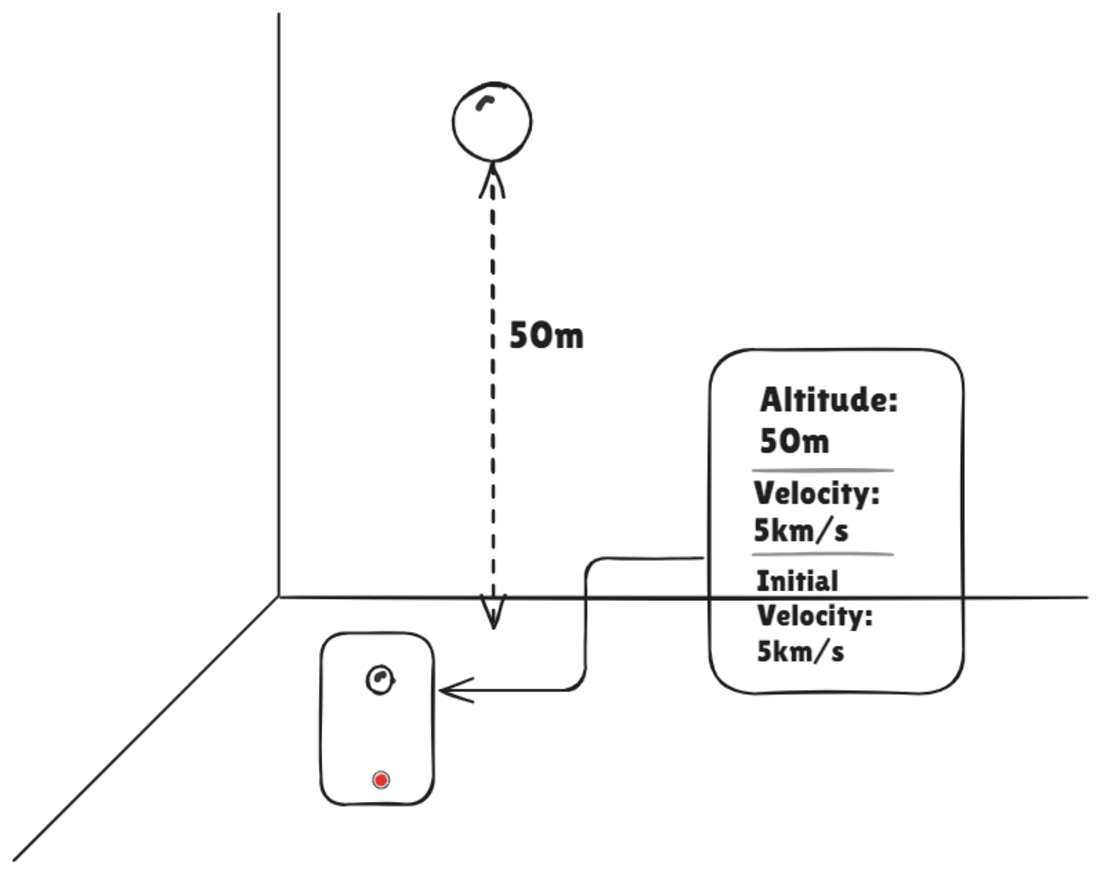

In [42]:
import PIL.Image
img = PIL.Image.open('image.jpg')
img

In [62]:
model = genai.GenerativeModel('gemini-exp-1206')

In [63]:
response = model.generate_content(img)
to_markdown(response.text)

> The image depicts a scenario with a balloon 50 meters above a device on the ground * A panel on the right displays the following information:
> 
> *   **Altitude:** 50m
> *   **Velocity:** 5km/s
> *   **Initial Velocity:** 5km/s
> 
> The device on the ground appears to be tracking or interacting with the balloon, as indicated by the dotted line and arrow * The setup suggests a measurement or experiment involving the balloon's altitude and velocity *

In [77]:
response = model.generate_content(["Write a short, engaging blog post based on this picture.", img], stream = True)

In [78]:
for chunk in response:
    if hasattr(chunk, 'text'):
        display(to_markdown(chunk.text))
    else:
        print("No 'text' attribute found in chunk:", chunk)

> Okay

> , here's a short, engaging blog post based on the image you provided

> :
> 
> **Is it a Bird? Is it a Plane? No, it

> 's a Balloon!**
> 
> Ever wondered what goes on behind the scenes of those cool gadgets that capture amazing aerial footage? This diagram gives us a sneak peek

> ! We've got a balloon soaring at an altitude of 50 meters, and some kind of device (maybe a camera or sensor?) on the ground

>  tracking it *
> 
> The balloon is moving at a velocity of 5 km/s, and the tracking device had the same initial velocity * It seems like the device is designed to follow the balloon's movements, maybe keeping it in frame

>  for a perfect shot or collecting data about its flight *
> 
> This simple setup has big implications! Think about the possibilities:
> 
> *   **Aerial photography and videography:** Capturing stunning views from above *
> *   **Weather monitoring:**

>  Gathering data on atmospheric conditions *
> *   **Surveillance:** Keeping an eye on things from a distance *
> 
> What other uses can you imagine for this balloon and tracker combo? Let us know in the comments!
